In [2]:
import wrangle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

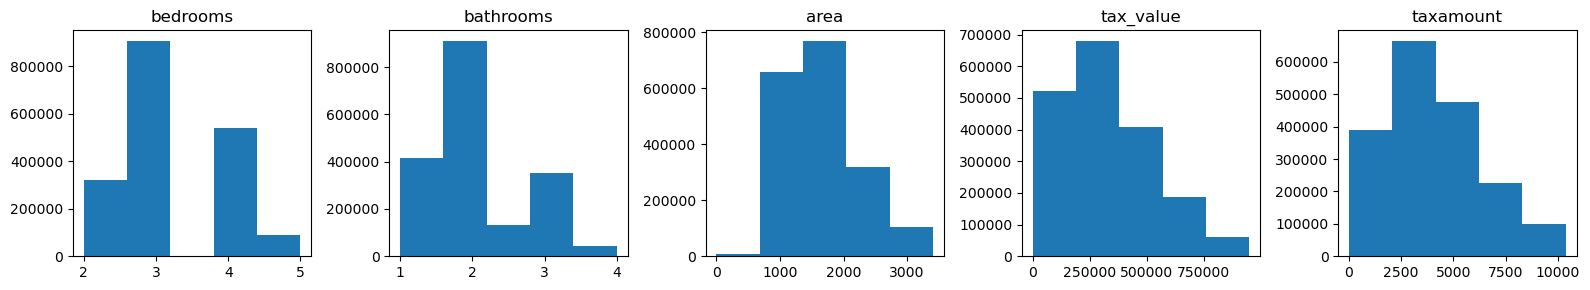

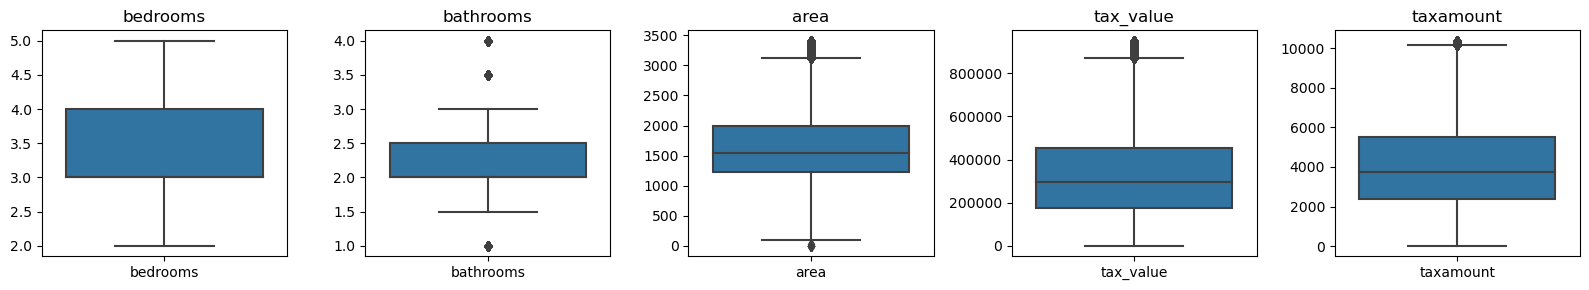

((1038959, 7), (445269, 7), (371057, 7))

In [5]:
train, validate, test = wrangle.wrangle_zillow()
train.shape, validate.shape, test.shape

In [6]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0
306031,2.0,1.0,1452.0,81169.0,1946.0,1310.88,6037.0
1038595,3.0,1.0,1000.0,119174.0,1950.0,1900.28,6037.0
270959,3.0,2.0,1974.0,432268.0,1988.0,5315.27,6037.0


In [7]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038959 entries, 10057 to 843328
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1038959 non-null  float64
 1   bathrooms   1038959 non-null  float64
 2   area        1038959 non-null  float64
 3   tax_value   1038959 non-null  float64
 4   year_built  1038959 non-null  float64
 5   taxamount   1038959 non-null  float64
 6   fips        1038959 non-null  object 
dtypes: float64(6), object(1)
memory usage: 63.4+ MB


In [8]:
#copy of the df so i don't mess with the original
train_scaled = train.copy()

In [12]:
columns_to_scale = ['bedrooms', 'bathrooms', 'area', 'taxamount']

scaler = MinMaxScaler()
# fit the object to my data:
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [9]:
train_scaled.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0
306031,2.0,1.0,1452.0,81169.0,1946.0,1310.88,6037.0
1038595,3.0,1.0,1000.0,119174.0,1950.0,1900.28,6037.0
270959,3.0,2.0,1974.0,432268.0,1988.0,5315.27,6037.0


Text(0.5, 1.0, 'Scaled')

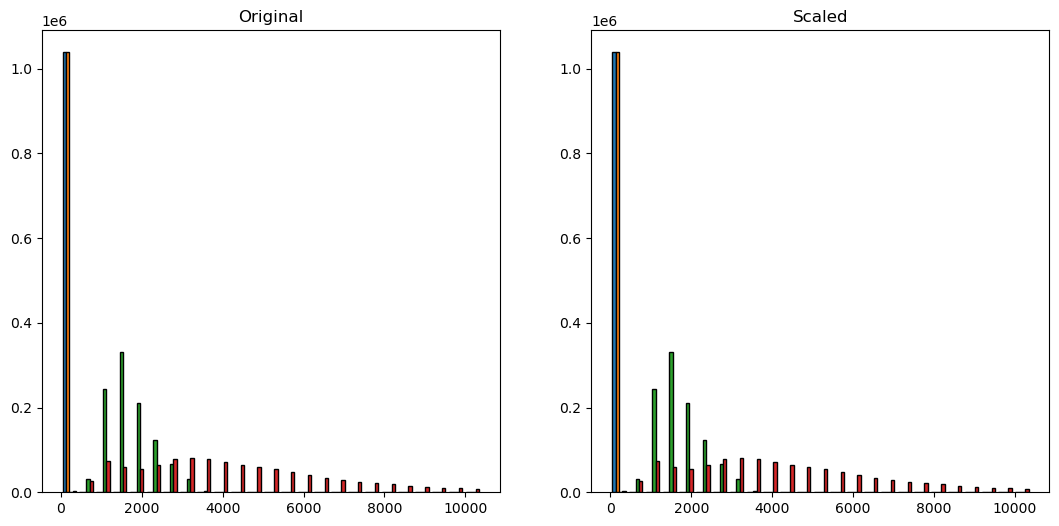

In [13]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train[columns_to_scale], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train[columns_to_scale], bins=25, ec='black')
plt.title('Scaled')

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [14]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    '''
    This function takes in a specific scaler, dataframe, 
    and returns two visuals of that data,
    one prior to scaling and one after scaling
    '''
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

#### MinMaxScaler

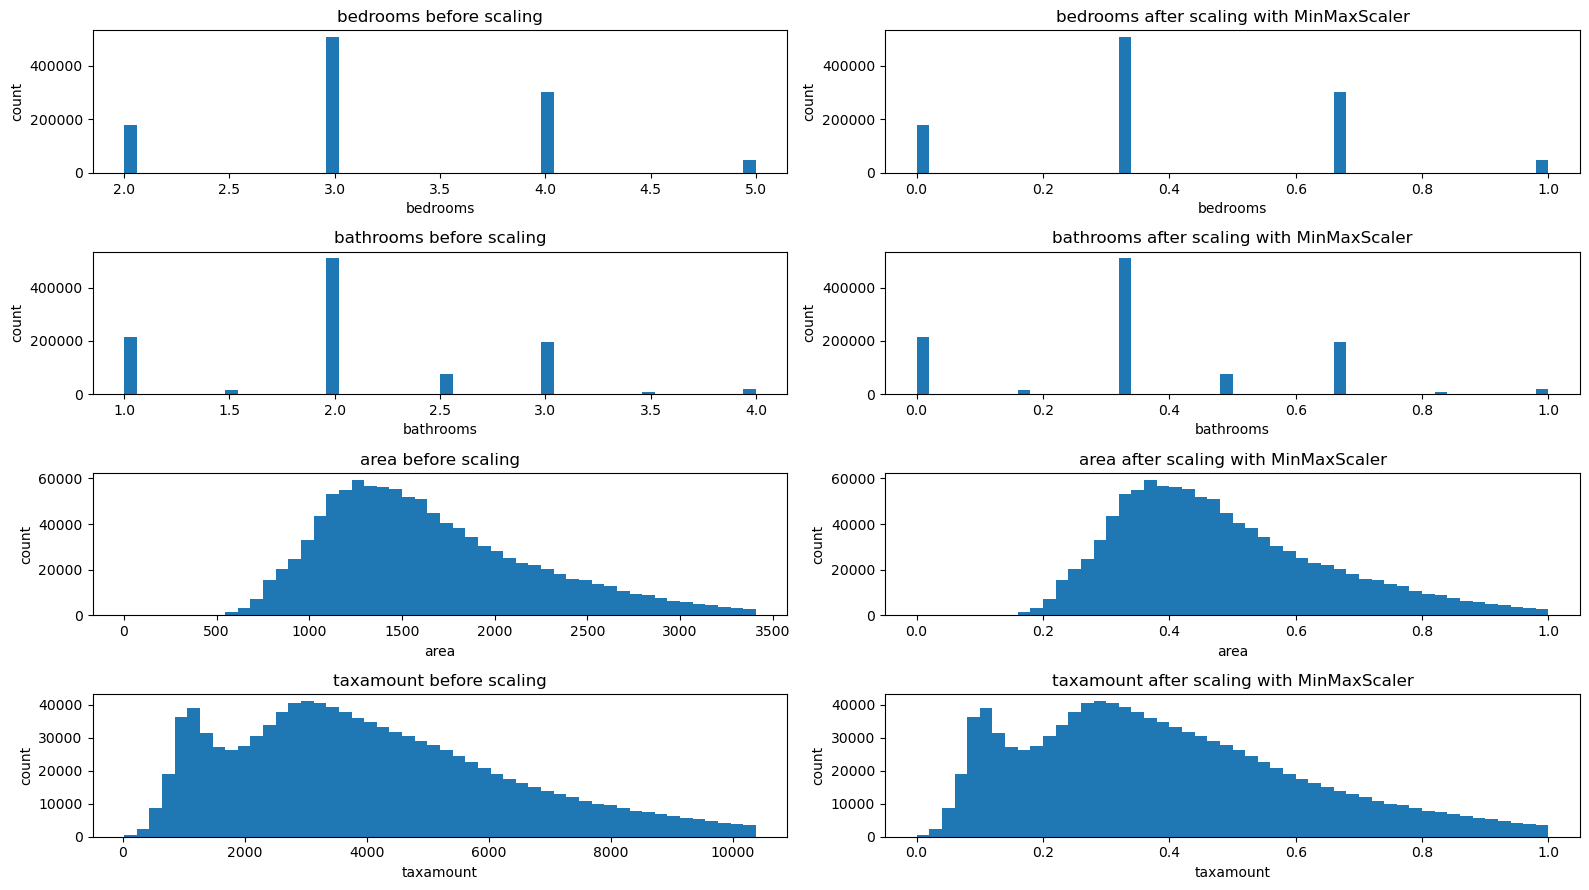

In [15]:
visualize_scaler(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

#### StandardScaler

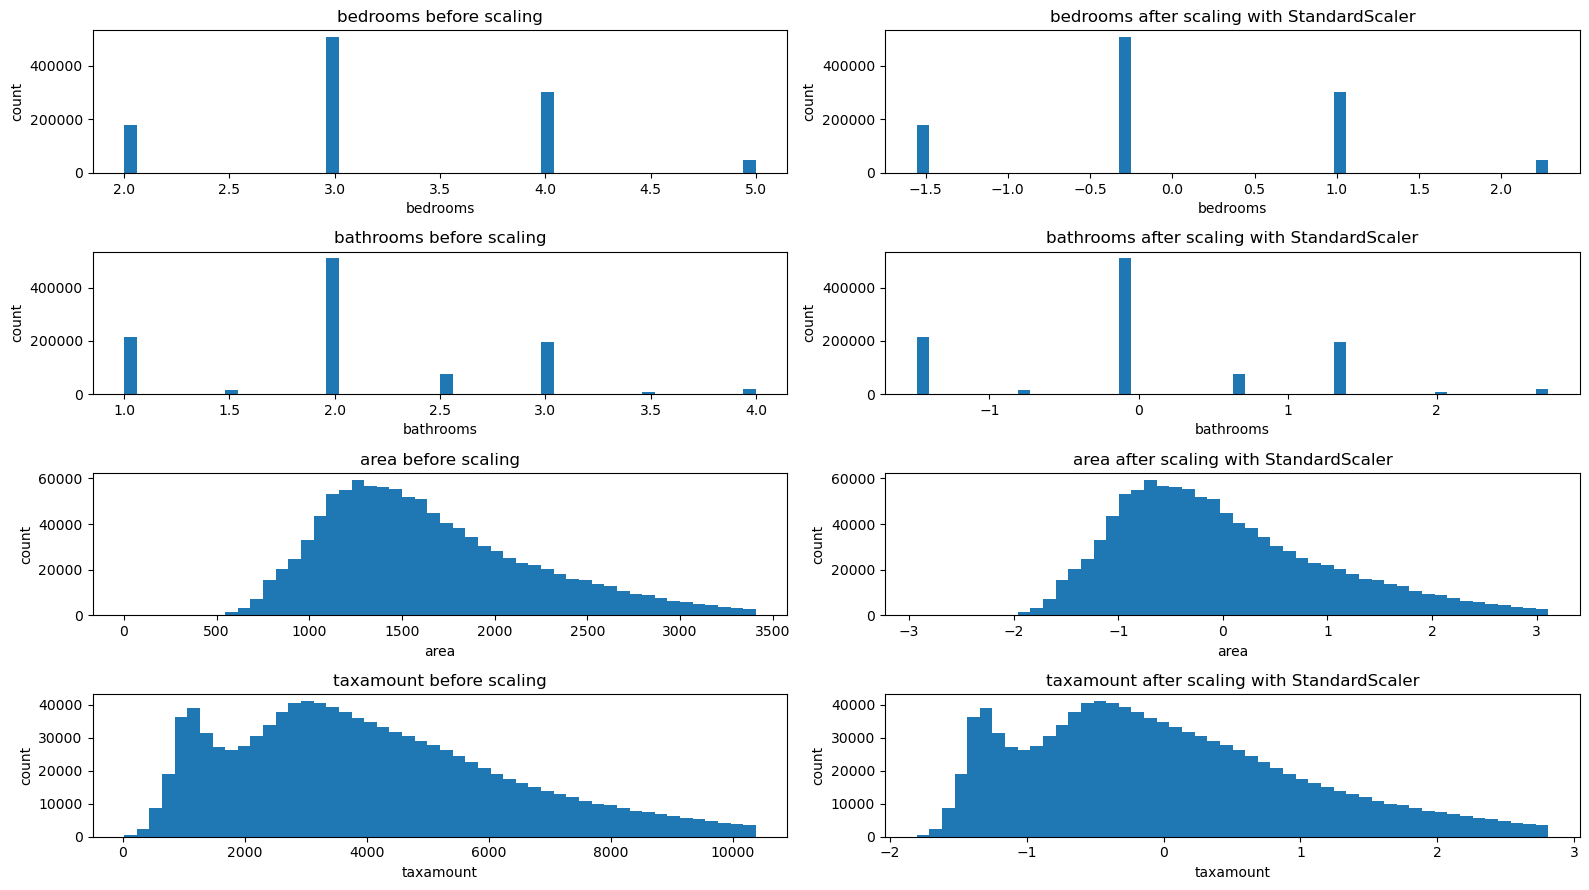

In [16]:
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

#### RobustScaler

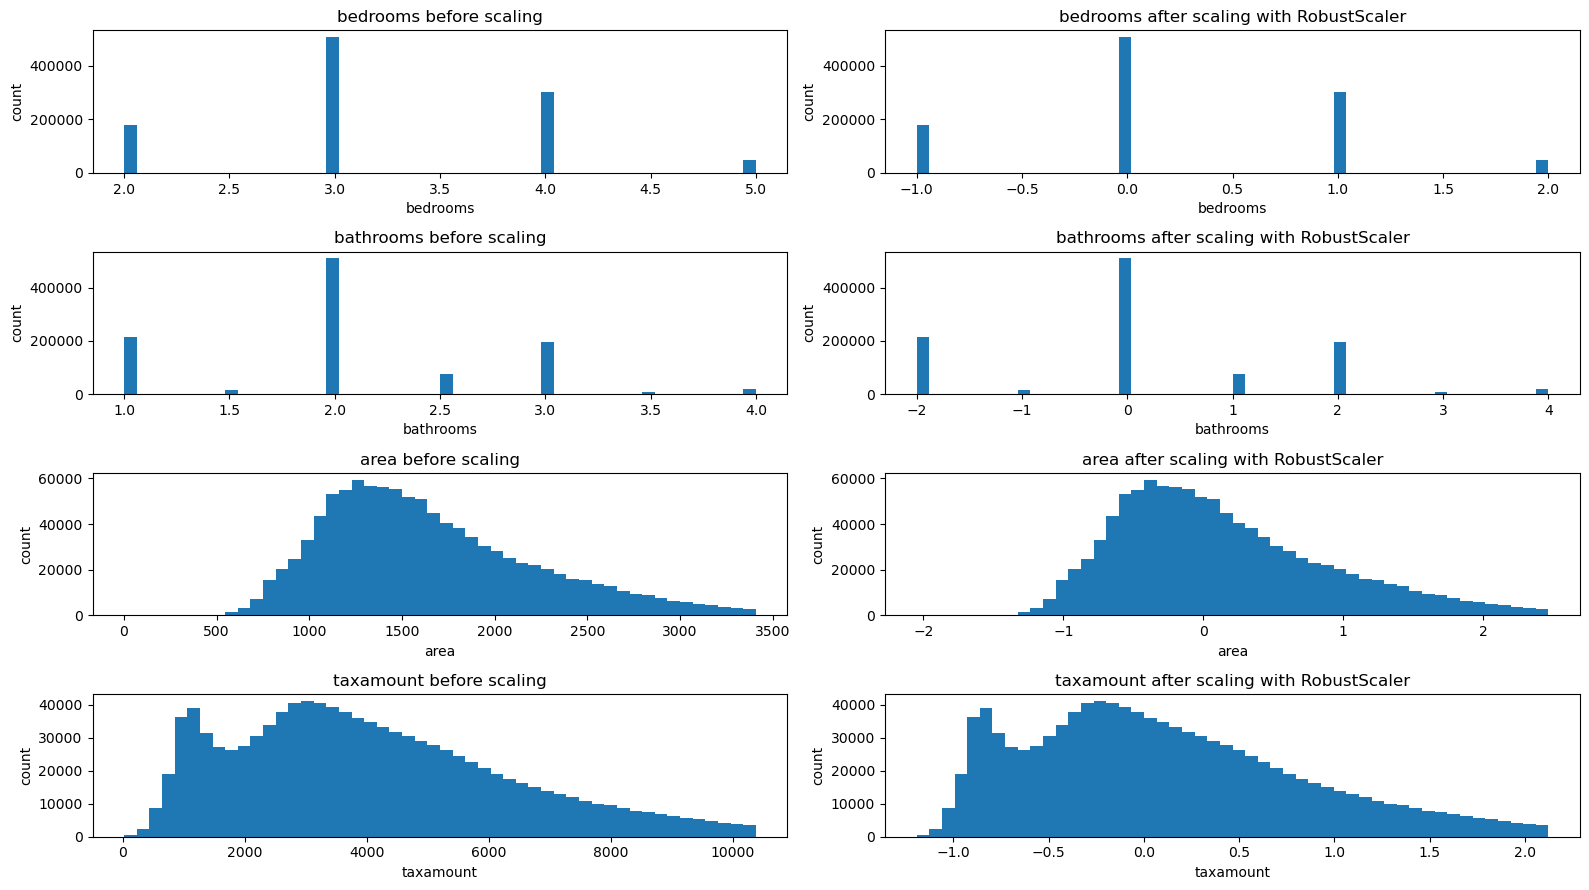

In [17]:
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [19]:
#create
scaler_minmax = MinMaxScaler()
#fit
scaler_minmax.fit(train[['taxamount']])
#use
train['minmax_taxamount'] = scaler_minmax.transform(train[['taxamount']])
#use inverse
train['mm_tax_inverse']= scaler_minmax.inverse_transform(train[['minmax_taxamount']])

In [20]:
def vis_scaler_inverse(scaler, df, columns_to_scale, bins=10):
    '''
    This function takes in a specific scaler, dataframe, 
    and returns two visuals of that data,
    one prior to scaling and one after scaling
    '''
    fig, axs = plt.subplots(len(columns_to_scale), 3, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    df_inverse = df.copy()
    df_inverse[columns_to_scale] = scaler.inverse_transform(df[columns_to_scale])

    for (ax1, ax2, ax3), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
        ax3.hist(df_inverse[col], bins=bins)
        ax3.set(title=f'{col} after inverse transform {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

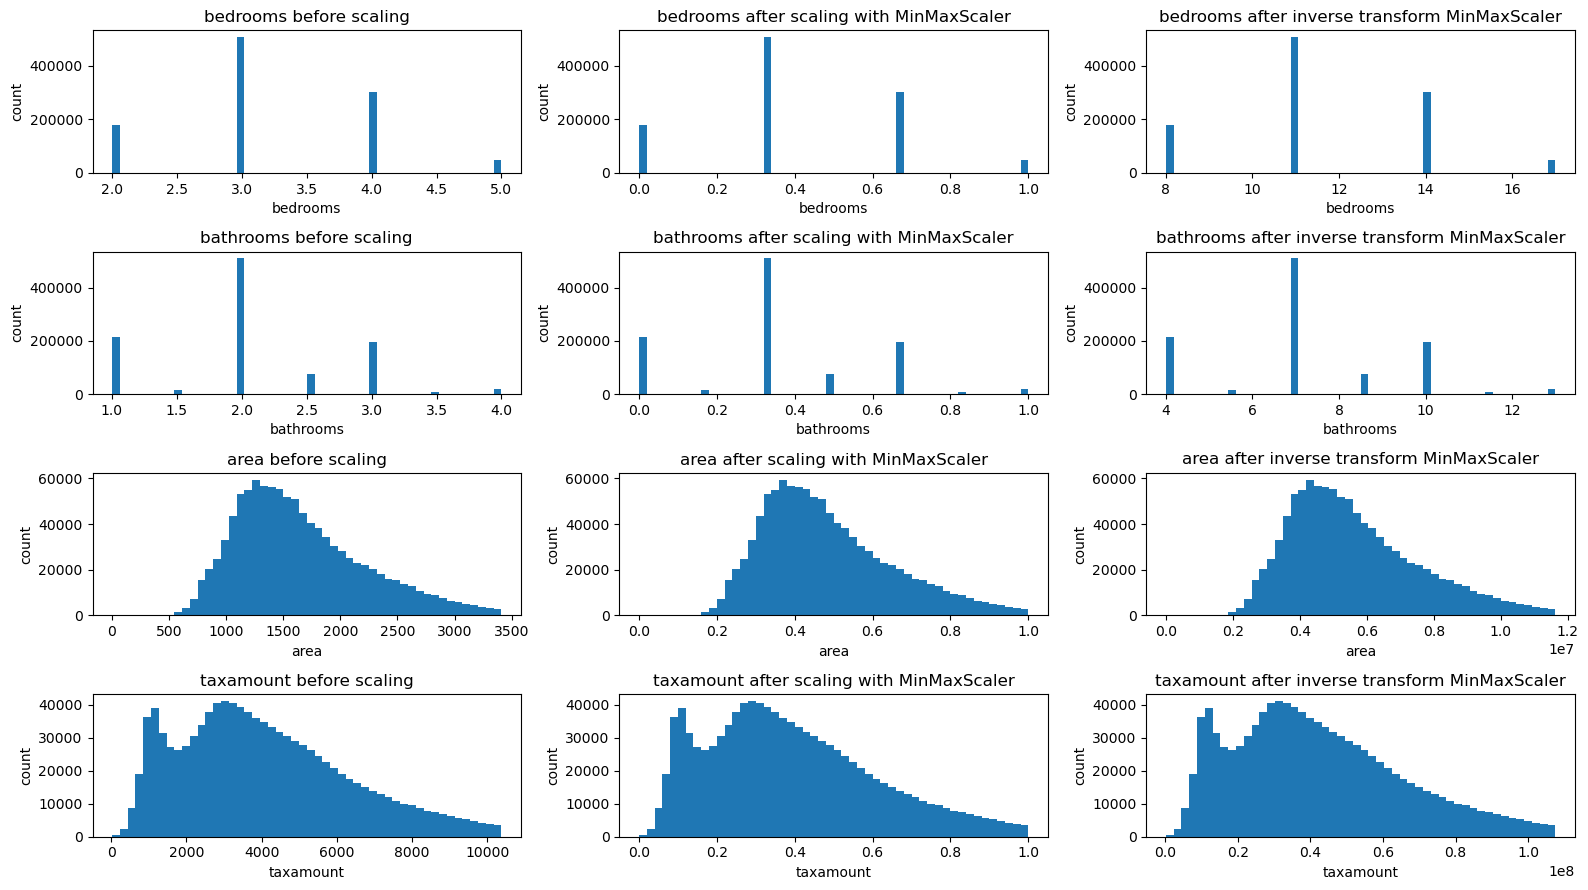

In [21]:
vis_scaler_inverse(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [23]:
#create
quantile_mc = QuantileTransformer(output_distribution='normal')
#fit
quantile_mc.fit(train[['taxamount']])
#transform and create columns
train['taxamount_quantile'] = quantile_mc.transform(train[['taxamount']])

In [24]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,minmax_taxamount,mm_tax_inverse,taxamount_quantile
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0,0.239843,2504.40,-0.605599
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0,0.159469,1671.93,-1.001899
306031,2.0,1.0,1452.0,81169.0,1946.0,1310.88,6037.0,0.124610,1310.88,-1.223608
1038595,3.0,1.0,1000.0,119174.0,1950.0,1900.28,6037.0,0.181516,1900.28,-0.889156
270959,3.0,2.0,1974.0,432268.0,1988.0,5315.27,6037.0,0.511229,5315.27,0.608485


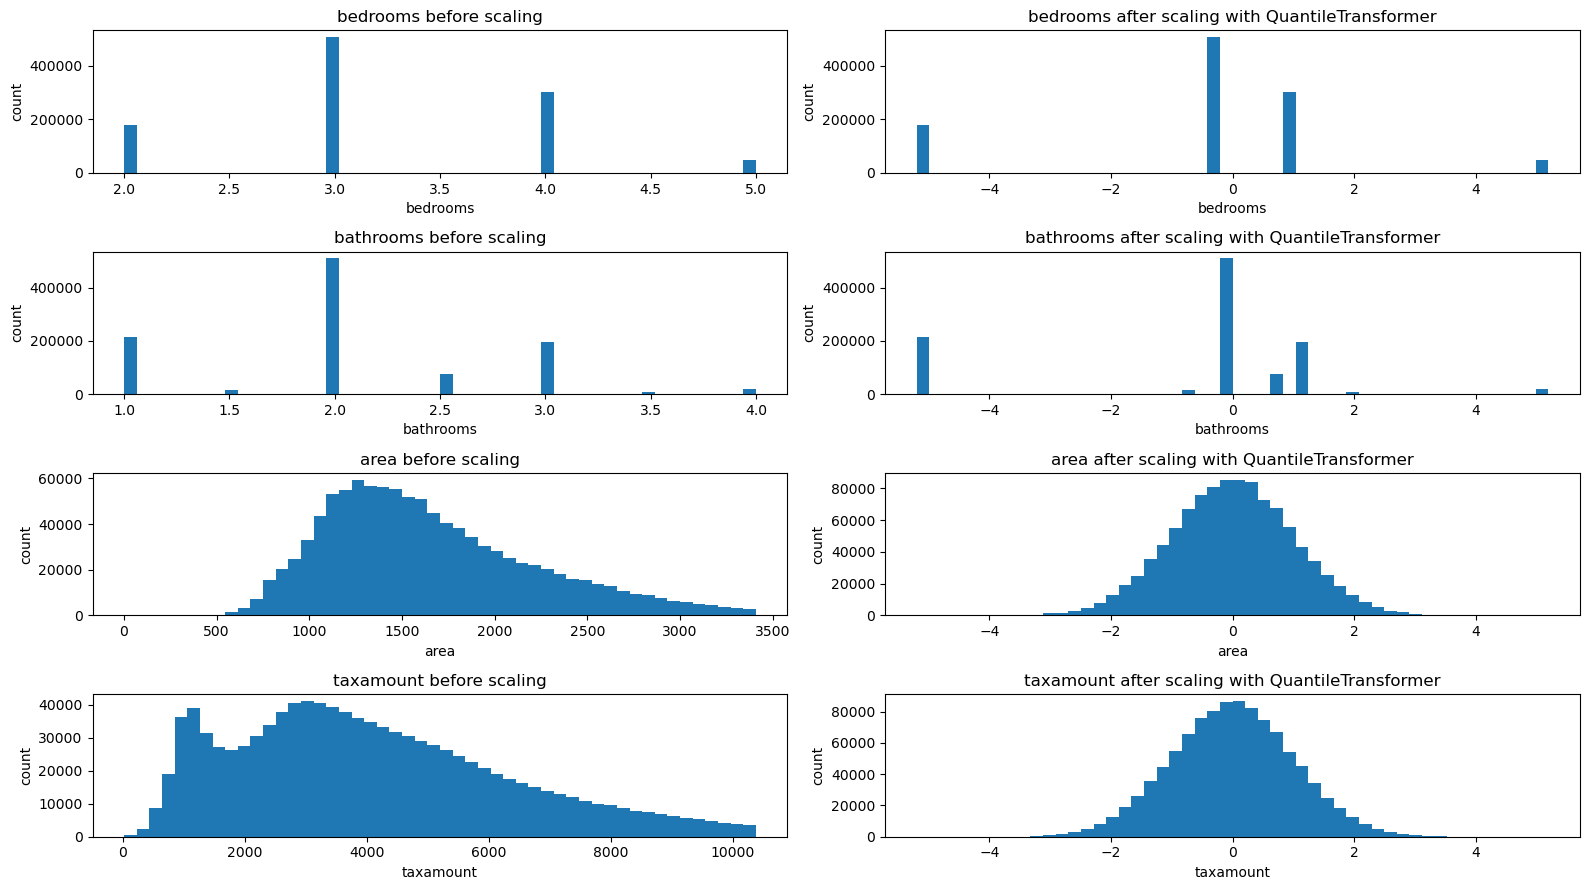

In [25]:
visualize_scaler(scaler=QuantileTransformer(output_distribution = 'normal'), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


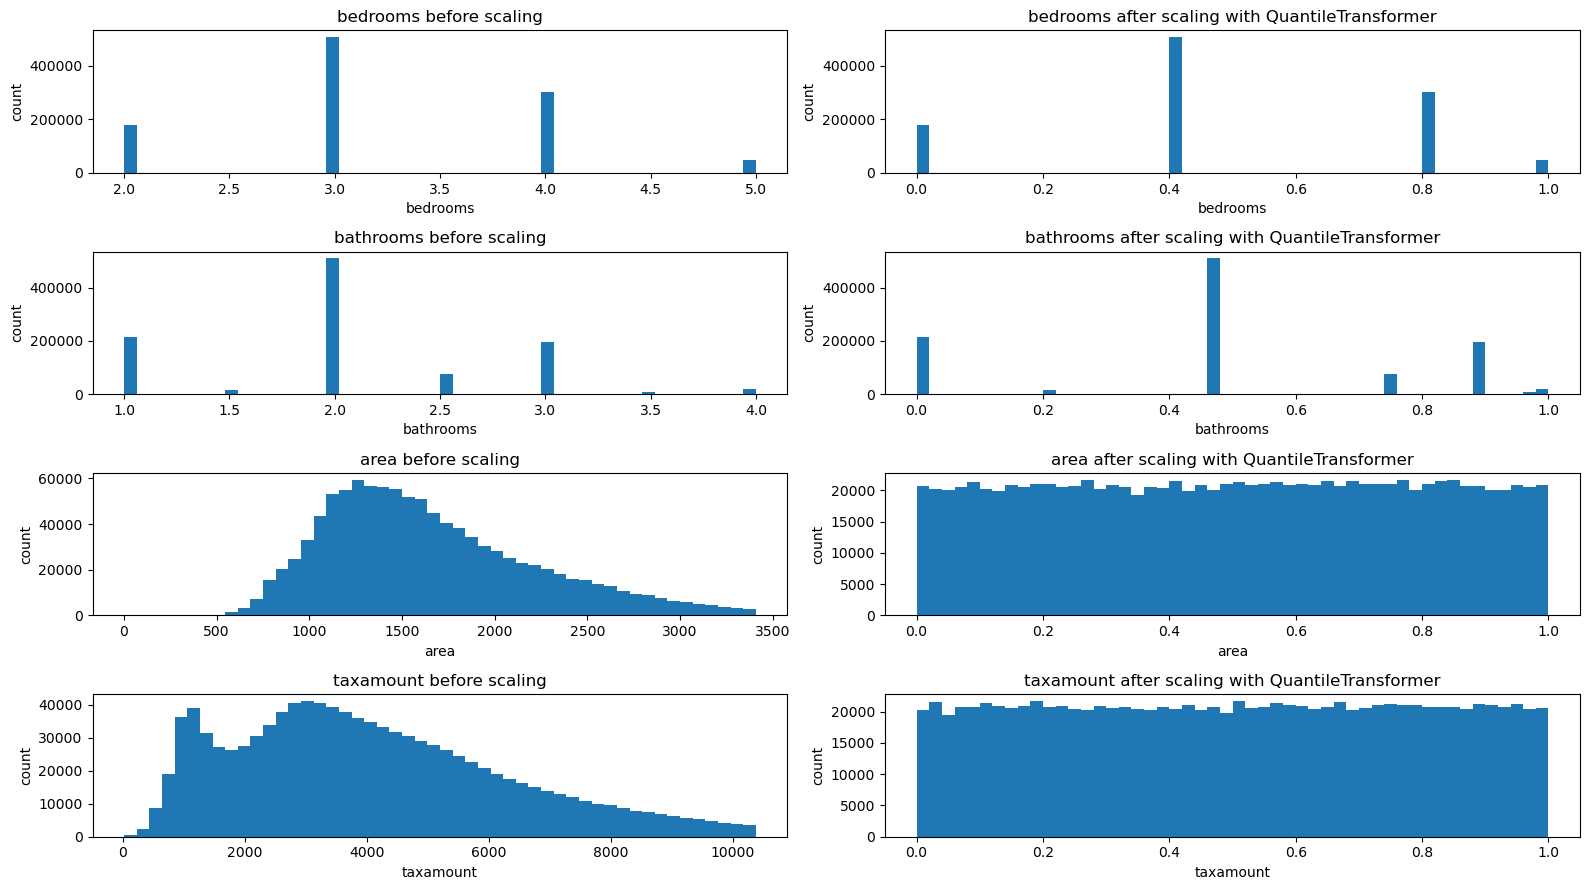

In [26]:
visualize_scaler(scaler=QuantileTransformer(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [27]:
def Min_Max_scaler(X_train, X_validate, X_test):
    '''
    Takes in three pandas DataFrames: X_train, X_validate, X_test
    output: scaler object, sclaer versions of X_train, X_validate, and X_test
    
    This function assumes the independent variables being fed into it as arguements 
    are all consisting of continuous features (numeric variables)
    '''
    scaler = MinMaxScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index=X_validate.index, columns=X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [28]:
X_train= train[columns_to_scale]
X_validate = validate[columns_to_scale]
X_test = test[columns_to_scale]

In [29]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaler= Min_Max_scaler(X_train, X_validate, X_test)
X_train_scaled.head()

,bedrooms,bathrooms,area,taxamount
10057,0.666667,0.333333,0.457612,0.239843
2004970,0.333333,0.333333,0.518921,0.159469
306031,0.000000,0.000000,0.425638,0.124610
1038595,0.333333,0.000000,0.293048,0.181516
270959,0.333333,0.333333,0.578762,0.511229


### Pipeline Function

In [30]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedrooms', 'bathrooms', 'area', 'taxamount'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = MinMaxScaler()
    #     fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [31]:
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)

In [32]:
train_scaled.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,minmax_taxamount,mm_tax_inverse,taxamount_quantile
10057,0.666667,0.333333,0.457612,248240.0,1973.0,0.239843,6059.0,0.239843,2504.40,-0.605599
2004970,0.333333,0.333333,0.518921,88390.0,1960.0,0.159469,6037.0,0.159469,1671.93,-1.001899
306031,0.000000,0.000000,0.425638,81169.0,1946.0,0.124610,6037.0,0.124610,1310.88,-1.223608
1038595,0.333333,0.000000,0.293048,119174.0,1950.0,0.181516,6037.0,0.181516,1900.28,-0.889156
270959,0.333333,0.333333,0.578762,432268.0,1988.0,0.511229,6037.0,0.511229,5315.27,0.608485
